# PCA & t-SNE Visualization of Embeddings

Compare target, predicted, and random embeddings using both PCA and t-SNE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 1. Load Data

In [2]:
CSV_PATH = "embeddings.csv"  # <- Change this

df = pd.read_csv(CSV_PATH)
print(f"Loaded {len(df)} samples")
df.head()

Loaded 20000 samples


,sample_index,target_dim_0,target_dim_1,target_dim_2,target_dim_3,target_dim_4,target_dim_5,target_dim_6,target_dim_7,predicted_dim_0,...,predicted_dim_6,predicted_dim_7,random_dim_0,random_dim_1,random_dim_2,random_dim_3,random_dim_4,random_dim_5,random_dim_6,random_dim_7
0,0,-3.096051,3.561484,-2.268346,-4.933867,1.890964,-0.402615,2.714577,-1.929998,8.107720,...,1.687055,-4.382831,-0.188393,-0.862035,-0.784702,-1.167449,-0.123482,-1.384743,0.722616,-0.197038
1,1,-6.906901,3.567756,-10.697569,-9.316430,-0.975608,6.363911,9.851562,-3.456476,2.592028,...,0.289689,-5.289502,-1.117635,0.300198,-0.770320,-0.680369,0.331990,0.060001,-0.250700,-1.183049
2,2,-0.675388,-0.255922,-1.492815,-0.085465,-0.729260,1.719152,0.869937,0.436122,-0.324152,...,0.738039,0.293121,0.039328,0.057797,0.220607,0.194955,0.150367,-0.117034,-0.165309,0.083606
3,3,-10.136768,9.155208,-4.834434,4.393397,-4.469194,-7.251497,-10.791161,-0.213762,3.669116,...,0.472992,-8.577351,-1.437929,-0.072424,-1.249575,-0.953522,0.334001,-0.262558,-0.001550,-1.197094
4,4,0.988343,-2.533370,1.309662,1.088836,-1.403995,-1.675892,-2.021471,3.017354,1.464019,...,1.075411,1.391995,-0.426573,-0.602598,-0.613122,0.525582,-0.598393,-0.416496,0.099702,-0.834567


## 2. Extract Embeddings

In [3]:
target_cols = [f"target_dim_{i}" for i in range(8)]
predicted_cols = [f"predicted_dim_{i}" for i in range(8)]
random_cols = [f"random_dim_{i}" for i in range(8)]

target = df[target_cols].values
predicted = df[predicted_cols].values
random = df[random_cols].values

n_samples = len(target)
print(f"Embedding shape: {target.shape}")

Embedding shape: (20000, 8)


## 3. PCA

In [4]:
all_embeddings = np.vstack([target, predicted, random])

pca = PCA(n_components=2)
all_pca = pca.fit_transform(all_embeddings)

target_pca = all_pca[:n_samples]
predicted_pca = all_pca[n_samples:2*n_samples]
random_pca = all_pca[2*n_samples:]

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

PCA explained variance: 97.2%


## 4. t-SNE

In [5]:
tsne = TSNE(
    n_components=2,
    perplexity=min(30, n_samples - 1),  # perplexity must be < n_samples
    random_state=42,
    init='pca',
    learning_rate='auto'
)
all_tsne = tsne.fit_transform(all_embeddings)

target_tsne = all_tsne[:n_samples]
predicted_tsne = all_tsne[n_samples:2*n_samples]
random_tsne = all_tsne[2*n_samples:]

print("t-SNE complete")

t-SNE complete


## 5. Side-by-Side Comparison

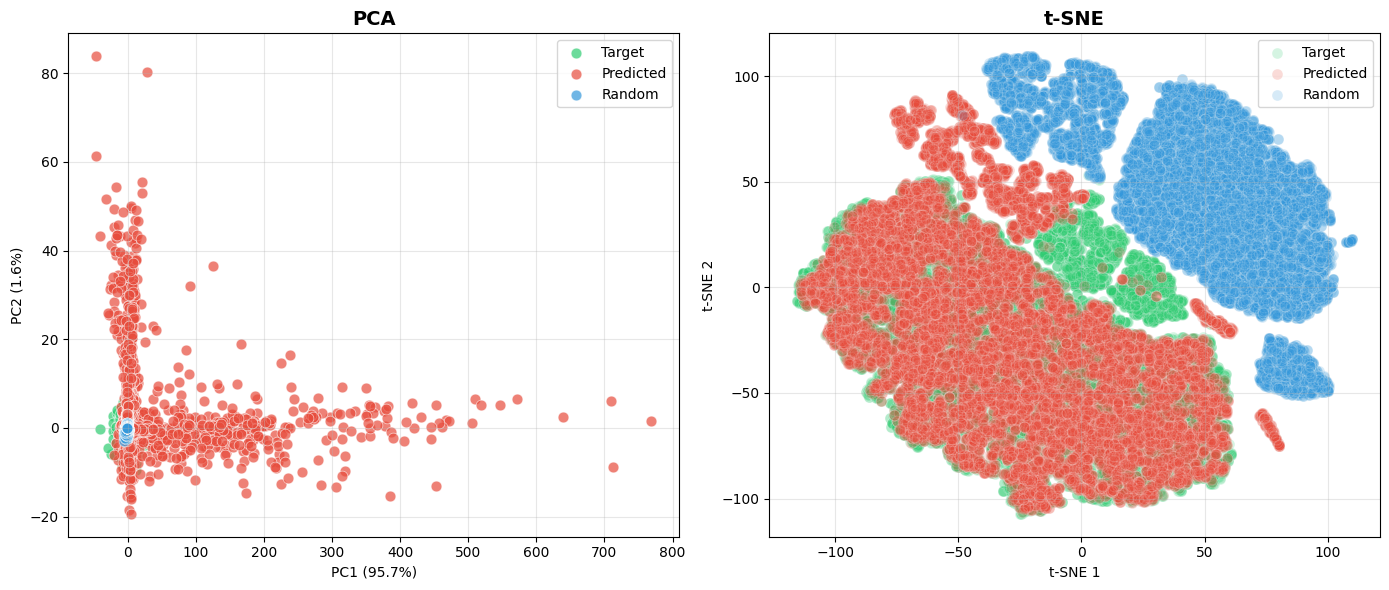

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = {'target': '#2ecc71', 'predicted': '#e74c3c', 'random': '#3498db'}

# PCA plot
ax = axes[0]
ax.scatter(target_pca[:, 0], target_pca[:, 1], c=colors['target'], label='Target', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(predicted_pca[:, 0], predicted_pca[:, 1], c=colors['predicted'], label='Predicted', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(random_pca[:, 0], random_pca[:, 1], c=colors['random'], label='Random', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
var = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f'PC1 ({var[0]:.1f}%)')
ax.set_ylabel(f'PC2 ({var[1]:.1f}%)')
ax.set_title('PCA', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# t-SNE plot
ax = axes[1]
ax.scatter(target_tsne[:, 0], target_tsne[:, 1], c=colors['target'], label='Target', alpha=0.2, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(predicted_tsne[:, 0], predicted_tsne[:, 1], c=colors['predicted'], label='Predicted', alpha=0.2, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(random_tsne[:, 0], random_tsne[:, 1], c=colors['random'], label='Random', alpha=0.2, s=60, edgecolors='white', linewidth=0.5)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_title('t-SNE', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. With Connecting Lines (Target ↔ Predicted)

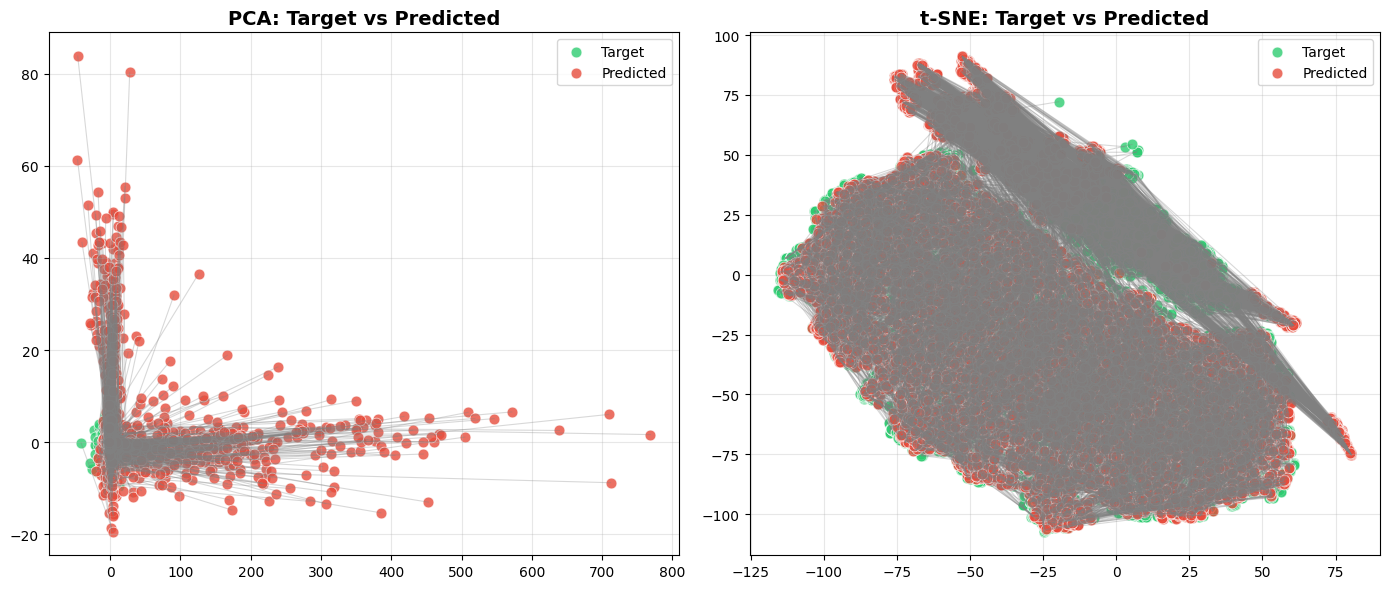

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (t, p, title) in zip(axes, [(target_pca, predicted_pca, 'PCA'), 
                                     (target_tsne, predicted_tsne, 't-SNE')]):
    # Lines
    for i in range(n_samples):
        ax.plot([t[i, 0], p[i, 0]], [t[i, 1], p[i, 1]], c='gray', alpha=0.3, linewidth=0.8)
    
    ax.scatter(t[:, 0], t[:, 1], c=colors['target'], label='Target', alpha=0.8, s=60, edgecolors='white', linewidth=0.5)
    ax.scatter(p[:, 0], p[:, 1], c=colors['predicted'], label='Predicted', alpha=0.8, s=60, edgecolors='white', linewidth=0.5)
    
    ax.set_title(f'{title}: Target vs Predicted', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Quantitative Comparison

In [8]:
# Distances in original 8D space
pred_dist = np.linalg.norm(target - predicted, axis=1)
rand_dist = np.linalg.norm(target - random, axis=1)

print("Euclidean distance in 8D space:")
print(f"  Target ↔ Predicted: {pred_dist.mean():.3f} ± {pred_dist.std():.3f}")
print(f"  Target ↔ Random:    {rand_dist.mean():.3f} ± {rand_dist.std():.3f}")
print(f"  Ratio (pred/rand):  {pred_dist.mean() / rand_dist.mean():.3f}")

Euclidean distance in 8D space:
  Target ↔ Predicted: 4.954 ± 29.115
  Target ↔ Random:    1.917 ± 2.895
  Ratio (pred/rand):  2.585


In [9]:
# Cosine similarity
def cosine_sim(a, b):
    return np.sum(a * b, axis=1) / (np.linalg.norm(a, axis=1) * np.linalg.norm(b, axis=1))

pred_cos = cosine_sim(target, predicted)
rand_cos = cosine_sim(target, random)

print("Cosine similarity:")
print(f"  Target ↔ Predicted: {pred_cos.mean():.3f} ± {pred_cos.std():.3f}")
print(f"  Target ↔ Random:    {rand_cos.mean():.3f} ± {rand_cos.std():.3f}")

Cosine similarity:
  Target ↔ Predicted: 0.807 ± 0.373
  Target ↔ Random:    -0.333 ± 0.272
